In [98]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Importar data desde csv
pagos_adelantados = pd.read_csv("D:/Débito automático/Comunicación/Noti pago antes del debito/analisis_Fio/pagos_adelantados.csv",encoding = "Windows-1252")
pagos_adelantados.tail()
#Windows-1252
#ISO-8859-1

In [100]:
#Ver el tipo de dato de cada columna
pagos_adelantados.dtypes

DOCUMENTO_IDENTIDAD       object
CUSTOMER_ID               object
ORIGEN                    object
ESTADO_CODIGO             object
DOCUMENTO_PAGO            object
FECHA_PAGO                object
FECHA_APLICACION_PAGO     object
IMPORTE_PAGADO           float64
DESCRIPCION_PAGO          object
DOCUMENTO_APLICADO        object
IMPORTE_RECIBO           float64
FECHA_EMISION             object
FECHA_VENCIMIENTO         object
ESTADO                    object
MONEDA                    object
FORMA_PAGO_ID              int64
ENTIDAD                   object
METODO_PAGO               object
FECHA_DEBITO              object
AFILIACION                object
VAR_DIAS_ADEL              int64
dtype: object

In [101]:
#Cambiar los tipos de datos
pagos_adelantados["FECHA_PAGO"]=pd.to_datetime(pagos_adelantados["FECHA_PAGO"], format="%d/%m/%Y")
pagos_adelantados["FECHA_APLICACION_PAGO"]=pd.to_datetime(pagos_adelantados["FECHA_APLICACION_PAGO"], format="%d/%m/%Y")
pagos_adelantados["FECHA_EMISION"]=pd.to_datetime(pagos_adelantados["FECHA_EMISION"], format="%d/%m/%Y")
pagos_adelantados["FECHA_VENCIMIENTO"]=pd.to_datetime(pagos_adelantados["FECHA_VENCIMIENTO"], format="%d/%m/%Y")
pagos_adelantados["FECHA_DEBITO"]=pd.to_datetime(pagos_adelantados["FECHA_DEBITO"], format="%d/%m/%Y")
pagos_adelantados["FORMA_PAGO_ID"]=pagos_adelantados["FORMA_PAGO_ID"].astype(str)

In [102]:
#Verificar cambios
pagos_adelantados.dtypes

DOCUMENTO_IDENTIDAD              object
CUSTOMER_ID                      object
ORIGEN                           object
ESTADO_CODIGO                    object
DOCUMENTO_PAGO                   object
FECHA_PAGO               datetime64[ns]
FECHA_APLICACION_PAGO    datetime64[ns]
IMPORTE_PAGADO                  float64
DESCRIPCION_PAGO                 object
DOCUMENTO_APLICADO               object
IMPORTE_RECIBO                  float64
FECHA_EMISION            datetime64[ns]
FECHA_VENCIMIENTO        datetime64[ns]
ESTADO                           object
MONEDA                           object
FORMA_PAGO_ID                    object
ENTIDAD                          object
METODO_PAGO                      object
FECHA_DEBITO             datetime64[ns]
AFILIACION                       object
VAR_DIAS_ADEL                     int64
dtype: object

In [104]:
#cant. de filas y columnas de la tabla
pagos_adelantados.shape

(264131, 21)

In [105]:
#Verificar non-null's
pagos_adelantados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264131 entries, 0 to 264130
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DOCUMENTO_IDENTIDAD    264131 non-null  object        
 1   CUSTOMER_ID            264131 non-null  object        
 2   ORIGEN                 264131 non-null  object        
 3   ESTADO_CODIGO          264131 non-null  object        
 4   DOCUMENTO_PAGO         264131 non-null  object        
 5   FECHA_PAGO             264131 non-null  datetime64[ns]
 6   FECHA_APLICACION_PAGO  264131 non-null  datetime64[ns]
 7   IMPORTE_PAGADO         264131 non-null  float64       
 8   DESCRIPCION_PAGO       264131 non-null  object        
 9   DOCUMENTO_APLICADO     264131 non-null  object        
 10  IMPORTE_RECIBO         264131 non-null  float64       
 11  FECHA_EMISION          264131 non-null  datetime64[ns]
 12  FECHA_VENCIMIENTO      264131 non-null  date

In [ ]:
#ANÁLISIS ENERO
pagos_adelantados_enero = pagos_adelantados[(pagos_adelantados["FECHA_PAGO"] >= "2024-01-01") & 
                  (pagos_adelantados["FECHA_PAGO"] <= "2024-01-31") &
                  (pagos_adelantados["VAR_DIAS_ADEL"]>0)]
pagos_adelantados_enero.tail()

In [107]:
#cant. de filas y columnas de la tabla de Enero
pagos_adelantados_enero.shape

(30941, 21)

In [109]:
#Resumen estadístico de la variable de análisis
pagos_adelantados_enero["VAR_DIAS_ADEL"].describe()

count    30941.000000
mean         6.765942
std          3.608575
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max        107.000000
Name: VAR_DIAS_ADEL, dtype: float64

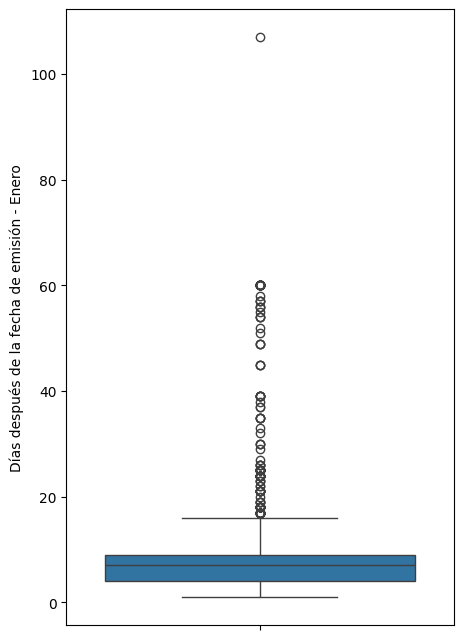

El Q1 es 4.0
El Q3 es 9.0


In [110]:
#Graficar Diagrama de cajas para ver la distribución de los datos
plt.figure(figsize=(5,8))
sns.boxplot(data=pagos_adelantados_enero["VAR_DIAS_ADEL"], showfliers=True).set_ylabel("Días después de la fecha de emisión - Enero")
plt.show()
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = pagos_adelantados_enero['VAR_DIAS_ADEL'].quantile(0.25)
Q3 = pagos_adelantados_enero['VAR_DIAS_ADEL'].quantile(0.75)
print(f"El Q1 es {Q1}")
print(f"El Q3 es {Q3}")

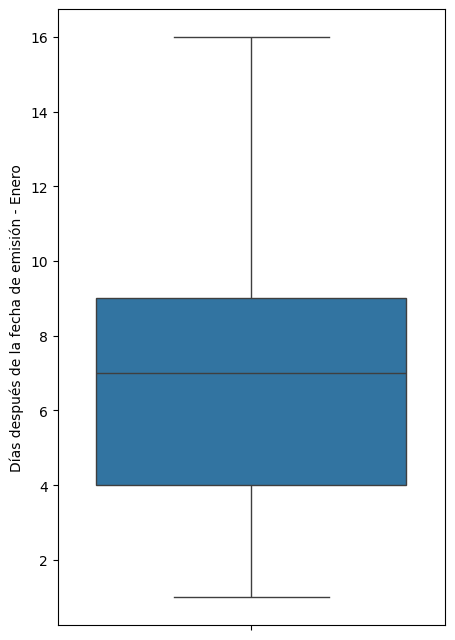

El Q1 es 4.0
El Q3 es 9.0


In [111]:
#Graficar Diagrama de cajas sin valores atípicos
plt.figure(figsize=(5,8))
sns.boxplot(data=pagos_adelantados_enero["VAR_DIAS_ADEL"], showfliers=False).set_ylabel("Días después de la fecha de emisión - Enero")
plt.show()
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = pagos_adelantados_enero['VAR_DIAS_ADEL'].quantile(0.25)
Q3 = pagos_adelantados_enero['VAR_DIAS_ADEL'].quantile(0.75)
print(f"El Q1 es {Q1}")
print(f"El Q3 es {Q3}")

In [112]:
# Calcular el IQR (rango intercuartílico)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrar los datos dentro de los bigotes
data_dentro_bigotes = pagos_adelantados_enero[(pagos_adelantados_enero['VAR_DIAS_ADEL'] >= limite_inferior) 
                                              & (pagos_adelantados_enero['VAR_DIAS_ADEL'] <= limite_superior)]
 
# Contar cuántos datos hay dentro de los bigotes
cantidad_dentro_bigotes = data_dentro_bigotes.shape[0]
 
# Contar el total de datos
total_datos = pagos_adelantados_enero.shape[0]
 
# Calcular el porcentaje de datos dentro de los bigotes
porcentaje_dentro_bigotes = (cantidad_dentro_bigotes / total_datos) * 100

print(f"Cantidad de data dentro de los bigotes: {cantidad_dentro_bigotes}")
print(f"Cantidad de data total de enero: {total_datos}")
print(f"Porcentaje de data dentro de los bigotes: {round(porcentaje_dentro_bigotes,2)}")

Cantidad de data dentro de los bigotes: 30770
Cantidad de data total de enero: 30941
Porcentaje de data dentro de los bigotes: 99.45


In [114]:
data_dentro_bigotes.shape

(30770, 21)

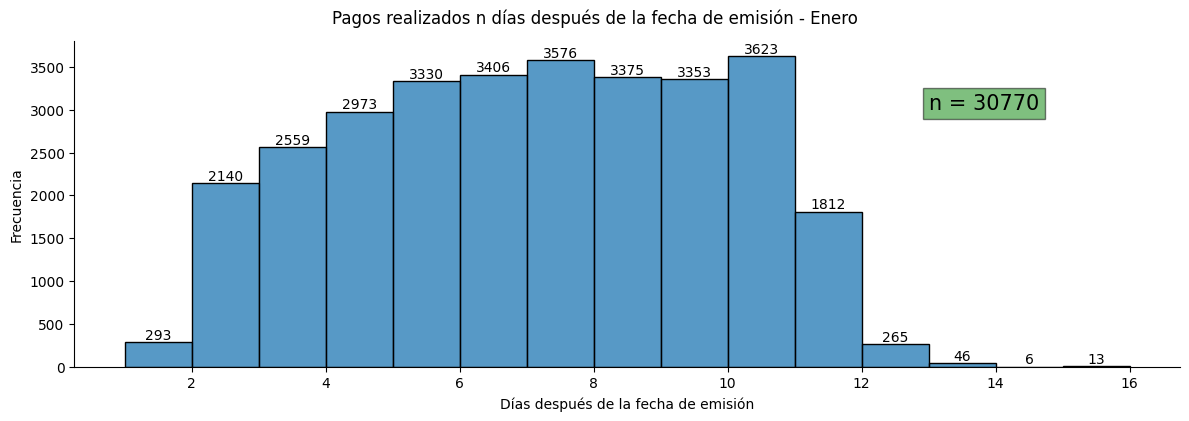

In [116]:
#Graficar histograma de los pagos
hist = sns.displot(data_dentro_bigotes["VAR_DIAS_ADEL"], bins=15 ,height=4, aspect=3)
hist.fig.suptitle("Pagos realizados n días después de la fecha de emisión - Enero", y=1.04)
hist.set_axis_labels("Días después de la fecha de emisión", "Frecuencia")
data = data_dentro_bigotes.shape[0]
#Agregar etiqueta de n datos
plt.text(13,3000,f"n = {data}", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
# Agregar etiquetas de datos sobre las barras
for ax in hist.axes.flat:  # Acceder al objeto Axes
    for p in ax.patches:  # Iterar sobre cada barra
        height = p.get_height()  # Obtener la altura (frecuencia) de cada barra
        ax.annotate(f'{int(height)}',  # Texto a mostrar (frecuencia)
                    (p.get_x() + p.get_width() / 2, height),  # Coordenadas
                    ha='center', va='bottom')  # Alineación
plt.show()


In [ ]:
#ANÁLISIS FEBRERO
pagos_adelantados_febrero = pagos_adelantados[(pagos_adelantados["FECHA_PAGO"] >= "2024-02-01") & 
                  (pagos_adelantados["FECHA_PAGO"] <= "2024-02-29") &
                  (pagos_adelantados["VAR_DIAS_ADEL"]>0)]
pagos_adelantados_febrero.tail()

In [118]:
#cant. de filas y columnas de la tabla
pagos_adelantados_febrero.shape

(27795, 21)

In [120]:
#Resumen estadístico de la variable de análisis
pagos_adelantados_febrero["VAR_DIAS_ADEL"].describe()

count    27795.000000
mean         6.399316
std          3.941689
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         98.000000
Name: VAR_DIAS_ADEL, dtype: float64

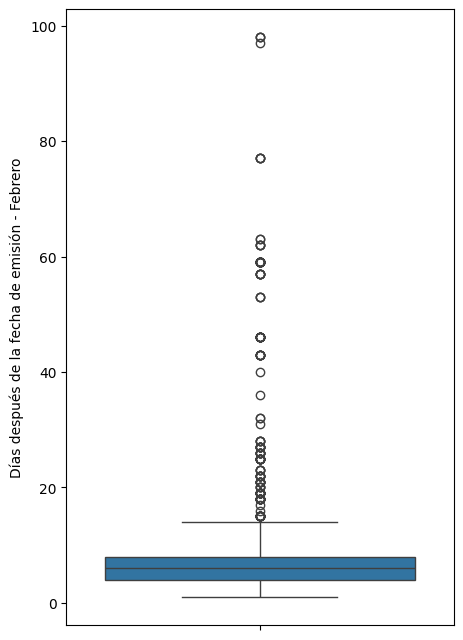

El Q1 es 4.0
El Q3 es 8.0


In [121]:
#Graficar Diagrama de cajas para ver la distribución de los datos
plt.figure(figsize=(5,8))
sns.boxplot(data=pagos_adelantados_febrero["VAR_DIAS_ADEL"]).set_ylabel("Días después de la fecha de emisión - Febrero")
plt.show()
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = pagos_adelantados_febrero['VAR_DIAS_ADEL'].quantile(0.25)
Q3 = pagos_adelantados_febrero['VAR_DIAS_ADEL'].quantile(0.75)
print(f"El Q1 es {Q1}")
print(f"El Q3 es {Q3}")

In [122]:
# Calcular el IQR (rango intercuartílico)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrar los datos dentro de los bigotes
data_dentro_bigotes = pagos_adelantados_febrero[(pagos_adelantados_febrero['VAR_DIAS_ADEL'] >= limite_inferior) 
                                              & (pagos_adelantados_febrero['VAR_DIAS_ADEL'] <= limite_superior)]
 
# Contar cuántos datos hay dentro de los bigotes
cantidad_dentro_bigotes = data_dentro_bigotes.shape[0]
 
# Contar el total de datos
total_datos = pagos_adelantados_febrero.shape[0]
 
# Calcular el porcentaje de datos dentro de los bigotes
porcentaje_dentro_bigotes = (cantidad_dentro_bigotes / total_datos) * 100

print(f"Cantidad de data dentro de los bigotes: {cantidad_dentro_bigotes}")
print(f"Cantidad de data total de enero: {total_datos}")
print(f"Porcentaje de data dentro de los bigotes: {round(porcentaje_dentro_bigotes,2)}")

Cantidad de data dentro de los bigotes: 27612
Cantidad de data total de enero: 27795
Porcentaje de data dentro de los bigotes: 99.34


In [124]:
data_dentro_bigotes.shape

(27612, 21)

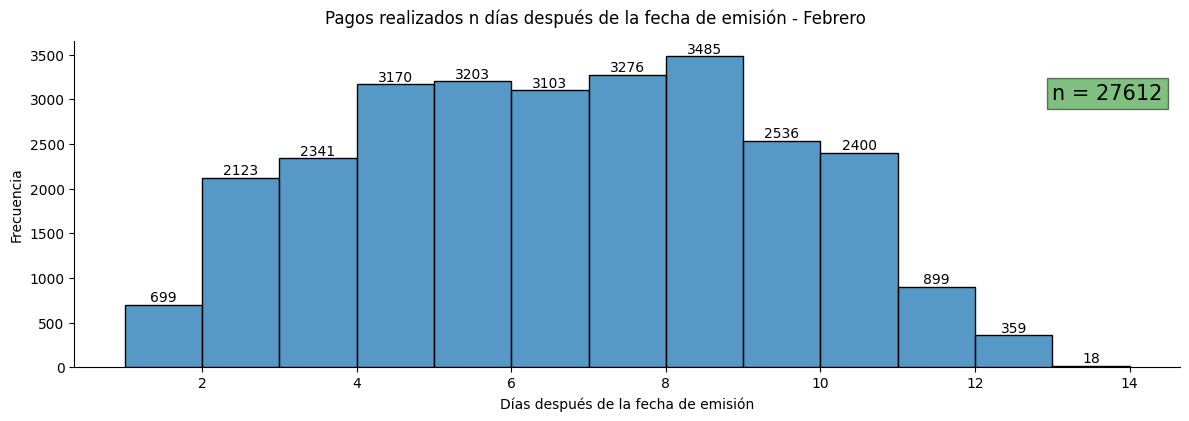

In [126]:
#Graficar histograma de los pagos
hist = sns.displot(data_dentro_bigotes["VAR_DIAS_ADEL"], 
            bins=13 ,height=4, aspect=3)
hist.fig.suptitle("Pagos realizados n días después de la fecha de emisión - Febrero", y=1.04)
hist.set_axis_labels("Días después de la fecha de emisión", "Frecuencia")
data = data_dentro_bigotes.shape[0]
plt.text(13,3000,f"n = {data}", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
# Agregar etiquetas de datos sobre las barras
for ax in hist.axes.flat:  # Acceder al objeto Axes
    for p in ax.patches:  # Iterar sobre cada barra
        height = p.get_height()  # Obtener la altura (frecuencia) de cada barra
        ax.annotate(f'{int(height)}',  # Texto a mostrar (frecuencia)
                    (p.get_x() + p.get_width() / 2, height),  # Coordenadas
                    ha='center', va='bottom')  # Alineación
plt.show()

In [ ]:
#ANÁLISIS MARZO
pagos_adelantados_marzo = pagos_adelantados[(pagos_adelantados["FECHA_PAGO"] >= "2024-03-01") & 
                  (pagos_adelantados["FECHA_PAGO"] <= "2024-03-31") &
                  (pagos_adelantados["VAR_DIAS_ADEL"]>0)]
pagos_adelantados_marzo.tail()

In [128]:
#cant. de filas y columnas de la tabla
pagos_adelantados_marzo.shape

(29674, 21)

In [130]:
#Resumen estadístico de la variable de análisis
pagos_adelantados_marzo["VAR_DIAS_ADEL"].describe()

count    29674.000000
mean         6.794601
std          3.326325
min          1.000000
25%          5.000000
50%          7.000000
75%          9.000000
max        109.000000
Name: VAR_DIAS_ADEL, dtype: float64

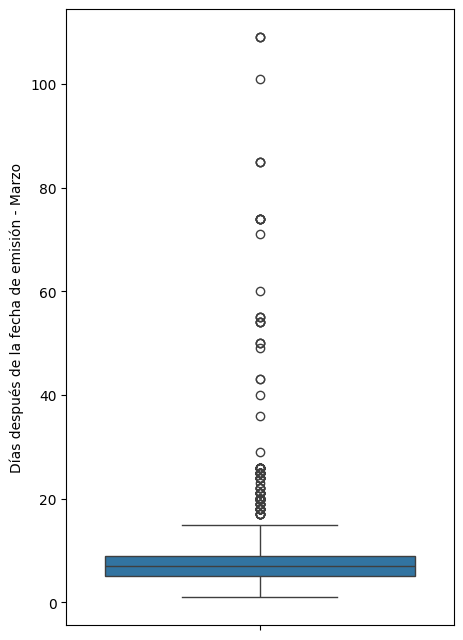

El Q1 es 5.0
El Q3 es 9.0


In [131]:
#Graficar Diagrama de cajas para ver la distribución de los datos
plt.figure(figsize=(5,8))
sns.boxplot(data=pagos_adelantados_marzo["VAR_DIAS_ADEL"]).set_ylabel("Días después de la fecha de emisión - Marzo")
plt.show()
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = pagos_adelantados_marzo['VAR_DIAS_ADEL'].quantile(0.25)
Q3 = pagos_adelantados_marzo['VAR_DIAS_ADEL'].quantile(0.75)
print(f"El Q1 es {Q1}")
print(f"El Q3 es {Q3}")

In [132]:
# Calcular el IQR (rango intercuartílico)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrar los datos dentro de los bigotes
data_dentro_bigotes = pagos_adelantados_marzo[(pagos_adelantados_marzo['VAR_DIAS_ADEL'] >= limite_inferior) 
                                              & (pagos_adelantados_marzo['VAR_DIAS_ADEL'] <= limite_superior)]
 
# Contar cuántos datos hay dentro de los bigotes
cantidad_dentro_bigotes = data_dentro_bigotes.shape[0]
 
# Contar el total de datos
total_datos = pagos_adelantados_marzo.shape[0]
 
# Calcular el porcentaje de datos dentro de los bigotes
porcentaje_dentro_bigotes = (cantidad_dentro_bigotes / total_datos) * 100

print(f"Cantidad de data dentro de los bigotes: {cantidad_dentro_bigotes}")
print(f"Cantidad de data total de enero: {total_datos}")
print(f"Porcentaje de data dentro de los bigotes: {round(porcentaje_dentro_bigotes,2)}")

Cantidad de data dentro de los bigotes: 29495
Cantidad de data total de enero: 29674
Porcentaje de data dentro de los bigotes: 99.4


In [134]:
data_dentro_bigotes.shape

(29495, 21)

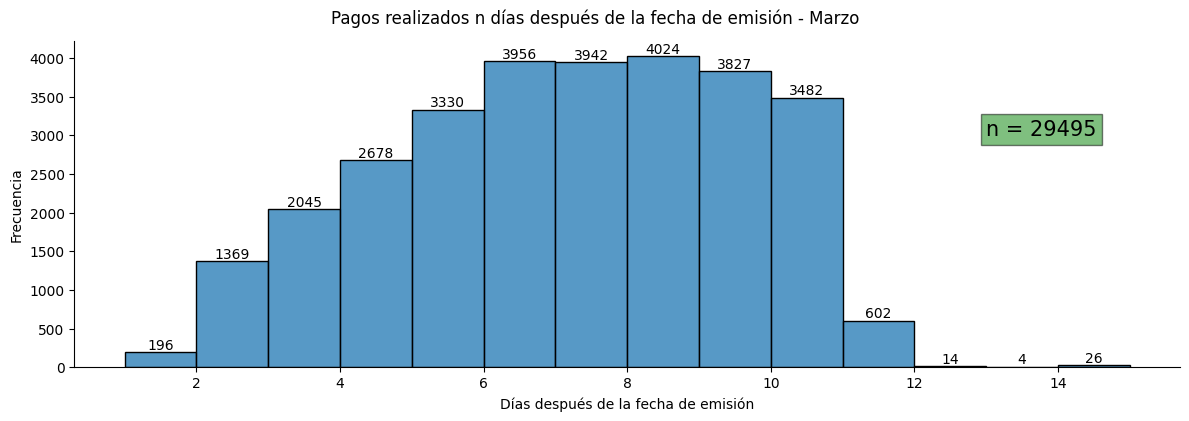

In [136]:
#Graficar histograma de los pagos
hist = sns.displot(data_dentro_bigotes["VAR_DIAS_ADEL"], 
            bins=14 ,height=4, aspect=3)
hist.fig.suptitle("Pagos realizados n días después de la fecha de emisión - Marzo", y=1.04)
hist.set_axis_labels("Días después de la fecha de emisión", "Frecuencia")
data = data_dentro_bigotes.shape[0]
plt.text(13,3000,f"n = {data}", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
# Agregar etiquetas de datos sobre las barras
for ax in hist.axes.flat:  # Acceder al objeto Axes
    for p in ax.patches:  # Iterar sobre cada barra
        height = p.get_height()  # Obtener la altura (frecuencia) de cada barra
        ax.annotate(f'{int(height)}',  # Texto a mostrar (frecuencia)
                    (p.get_x() + p.get_width() / 2, height),  # Coordenadas
                    ha='center', va='bottom')  # Alineación
plt.show()

In [ ]:
#ANÁLISIS ABRIL
pagos_adelantados_abril = pagos_adelantados[(pagos_adelantados["FECHA_PAGO"] >= "2024-04-01") & 
                  (pagos_adelantados["FECHA_PAGO"] <= "2024-04-30") &
                  (pagos_adelantados["VAR_DIAS_ADEL"]>0)]
pagos_adelantados_abril.tail()

In [138]:
#cant. de filas y columnas de la tabla
pagos_adelantados_abril.shape

(28848, 21)

In [140]:
#Resumen estadístico de la variable de análisis
pagos_adelantados_abril["VAR_DIAS_ADEL"].describe()

count    28848.000000
mean         6.902038
std          4.131111
min          1.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         93.000000
Name: VAR_DIAS_ADEL, dtype: float64

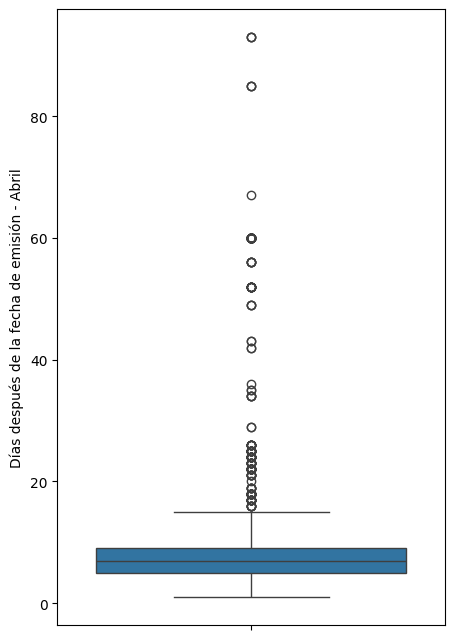

El Q1 es 5.0
El Q3 es 9.0


In [141]:
#Graficar Diagrama de cajas para ver la distribución de los datos
plt.figure(figsize=(5,8))
sns.boxplot(data=pagos_adelantados_abril["VAR_DIAS_ADEL"]).set_ylabel("Días después de la fecha de emisión - Abril")
plt.show()
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = pagos_adelantados_abril['VAR_DIAS_ADEL'].quantile(0.25)
Q3 = pagos_adelantados_abril['VAR_DIAS_ADEL'].quantile(0.75)
print(f"El Q1 es {Q1}")
print(f"El Q3 es {Q3}")

In [142]:
# Calcular el IQR (rango intercuartílico)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrar los datos dentro de los bigotes
data_dentro_bigotes = pagos_adelantados_abril[(pagos_adelantados_abril['VAR_DIAS_ADEL'] >= limite_inferior) 
                                              & (pagos_adelantados_abril['VAR_DIAS_ADEL'] <= limite_superior)]
 
# Contar cuántos datos hay dentro de los bigotes
cantidad_dentro_bigotes = data_dentro_bigotes.shape[0]
 
# Contar el total de datos
total_datos = pagos_adelantados_abril.shape[0]
 
# Calcular el porcentaje de datos dentro de los bigotes
porcentaje_dentro_bigotes = (cantidad_dentro_bigotes / total_datos) * 100

print(f"Cantidad de data dentro de los bigotes: {cantidad_dentro_bigotes}")
print(f"Cantidad de data total de enero: {total_datos}")
print(f"Porcentaje de data dentro de los bigotes: {round(porcentaje_dentro_bigotes,2)}")

Cantidad de data dentro de los bigotes: 28617
Cantidad de data total de enero: 28848
Porcentaje de data dentro de los bigotes: 99.2


In [144]:
data_dentro_bigotes.shape

(28617, 21)

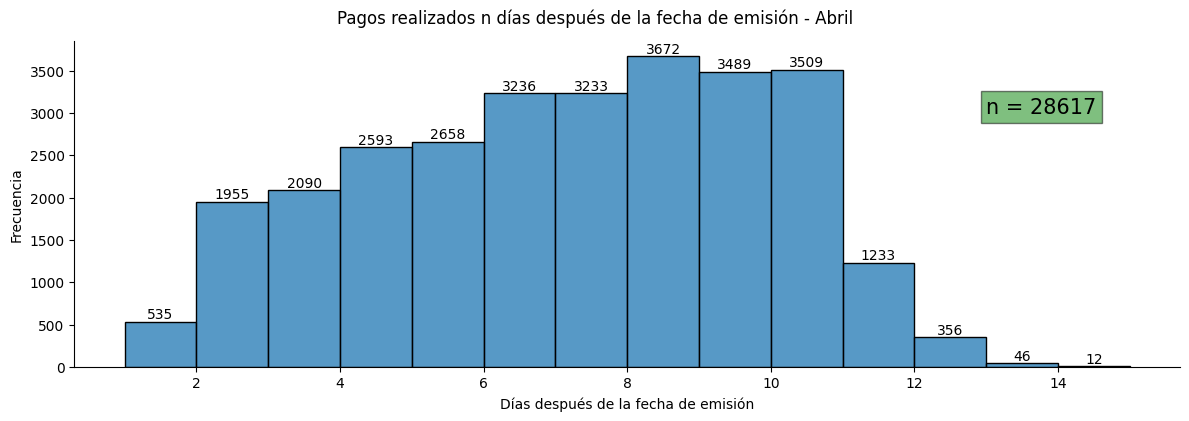

In [146]:
#Graficar histograma de los pagos
hist = sns.displot(data_dentro_bigotes["VAR_DIAS_ADEL"], 
            bins=14 ,height=4, aspect=3)
hist.fig.suptitle("Pagos realizados n días después de la fecha de emisión - Abril", y=1.04)
hist.set_axis_labels("Días después de la fecha de emisión", "Frecuencia")
data = data_dentro_bigotes.shape[0]
plt.text(13,3000,f"n = {data}", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
# Agregar etiquetas de datos sobre las barras
for ax in hist.axes.flat:  # Acceder al objeto Axes
    for p in ax.patches:  # Iterar sobre cada barra
        height = p.get_height()  # Obtener la altura (frecuencia) de cada barra
        ax.annotate(f'{int(height)}',  # Texto a mostrar (frecuencia)
                    (p.get_x() + p.get_width() / 2, height),  # Coordenadas
                    ha='center', va='bottom')  # Alineación
plt.show()

In [ ]:
#ANÁLISIS MAYO
pagos_adelantados_mayo = pagos_adelantados[(pagos_adelantados["FECHA_PAGO"] >= "2024-05-01") & 
                  (pagos_adelantados["FECHA_PAGO"] <= "2024-05-31") &
                  (pagos_adelantados["VAR_DIAS_ADEL"]>0)]
pagos_adelantados_mayo.tail()

In [148]:
#cant. de filas y columnas de la tabla
pagos_adelantados_mayo.shape

(30646, 21)

In [150]:
#Resumen estadístico de la variable de análisis
pagos_adelantados_mayo["VAR_DIAS_ADEL"].describe()

count    30646.000000
mean         6.509952
std          3.797537
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         95.000000
Name: VAR_DIAS_ADEL, dtype: float64

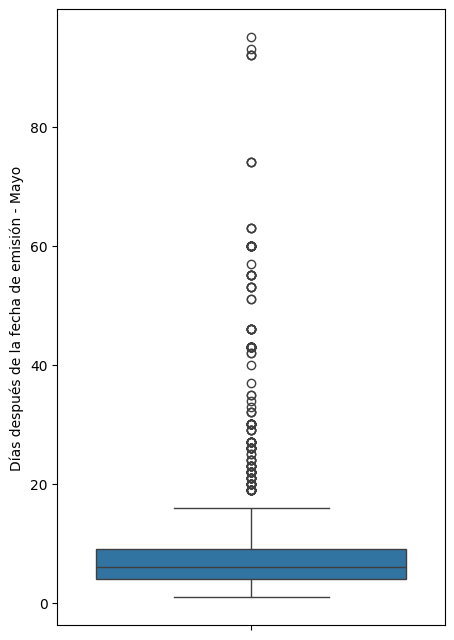

El Q1 es 4.0
El Q3 es 9.0


In [151]:
#Graficar Diagrama de cajas para ver la distribución de los datos
plt.figure(figsize=(5,8))
sns.boxplot(data=pagos_adelantados_mayo["VAR_DIAS_ADEL"]).set_ylabel("Días después de la fecha de emisión - Mayo")
plt.show()
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = pagos_adelantados_mayo['VAR_DIAS_ADEL'].quantile(0.25)
Q3 = pagos_adelantados_mayo['VAR_DIAS_ADEL'].quantile(0.75)
print(f"El Q1 es {Q1}")
print(f"El Q3 es {Q3}")

In [152]:
# Calcular el IQR (rango intercuartílico)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrar los datos dentro de los bigotes
data_dentro_bigotes = pagos_adelantados_mayo[(pagos_adelantados_mayo['VAR_DIAS_ADEL'] >= limite_inferior) 
                                              & (pagos_adelantados_mayo['VAR_DIAS_ADEL'] <= limite_superior)]
 
# Contar cuántos datos hay dentro de los bigotes
cantidad_dentro_bigotes = data_dentro_bigotes.shape[0]
 
# Contar el total de datos
total_datos = pagos_adelantados_mayo.shape[0]
 
# Calcular el porcentaje de datos dentro de los bigotes
porcentaje_dentro_bigotes = (cantidad_dentro_bigotes / total_datos) * 100

print(f"Cantidad de data dentro de los bigotes: {cantidad_dentro_bigotes}")
print(f"Cantidad de data total de enero: {total_datos}")
print(f"Porcentaje de data dentro de los bigotes: {round(porcentaje_dentro_bigotes,2)}")

Cantidad de data dentro de los bigotes: 30460
Cantidad de data total de enero: 30646
Porcentaje de data dentro de los bigotes: 99.39


In [154]:
data_dentro_bigotes.shape

(30460, 21)

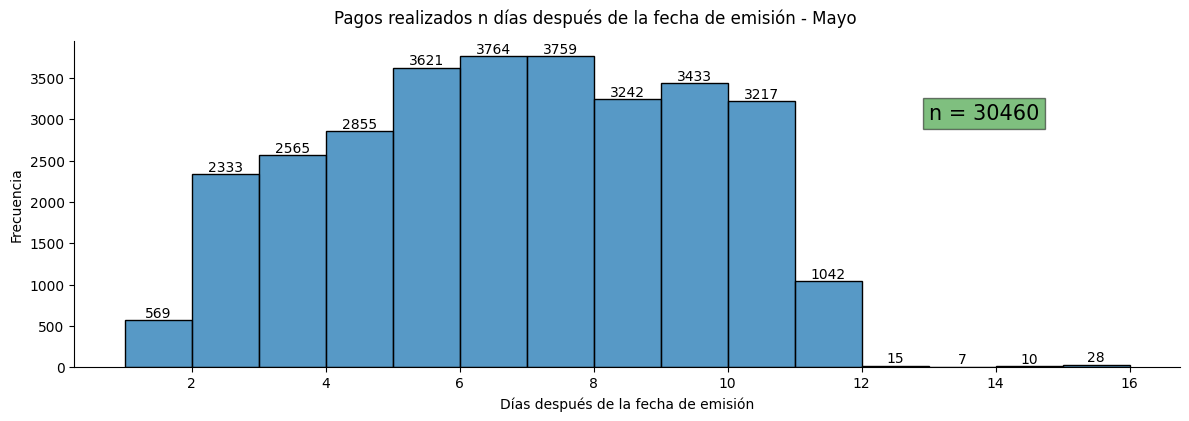

In [156]:
#Graficar histograma de los pagos
hist = sns.displot(data_dentro_bigotes["VAR_DIAS_ADEL"], 
            bins=15 ,height=4, aspect=3)
hist.fig.suptitle("Pagos realizados n días después de la fecha de emisión - Mayo", y=1.04)
hist.set_axis_labels("Días después de la fecha de emisión", "Frecuencia")
data = data_dentro_bigotes.shape[0]
plt.text(13,3000,f"n = {data}", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
# Agregar etiquetas de datos sobre las barras
for ax in hist.axes.flat:  # Acceder al objeto Axes
    for p in ax.patches:  # Iterar sobre cada barra
        height = p.get_height()  # Obtener la altura (frecuencia) de cada barra
        ax.annotate(f'{int(height)}',  # Texto a mostrar (frecuencia)
                    (p.get_x() + p.get_width() / 2, height),  # Coordenadas
                    ha='center', va='bottom')  # Alineación
plt.show()

In [ ]:
#ANÁLISIS JUNIO
pagos_adelantados_junio = pagos_adelantados[(pagos_adelantados["FECHA_PAGO"] >= "2024-06-01") & 
                  (pagos_adelantados["FECHA_PAGO"] <= "2024-06-30") &
                  (pagos_adelantados["VAR_DIAS_ADEL"]>0)]
pagos_adelantados_junio.tail()

In [158]:
#cant. de filas y columnas de la tabla
pagos_adelantados_junio.shape

(27785, 21)

In [160]:
#Resumen estadístico de la variable de análisis
pagos_adelantados_junio["VAR_DIAS_ADEL"].describe()

count    27785.000000
mean         6.509484
std          3.753805
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         94.000000
Name: VAR_DIAS_ADEL, dtype: float64

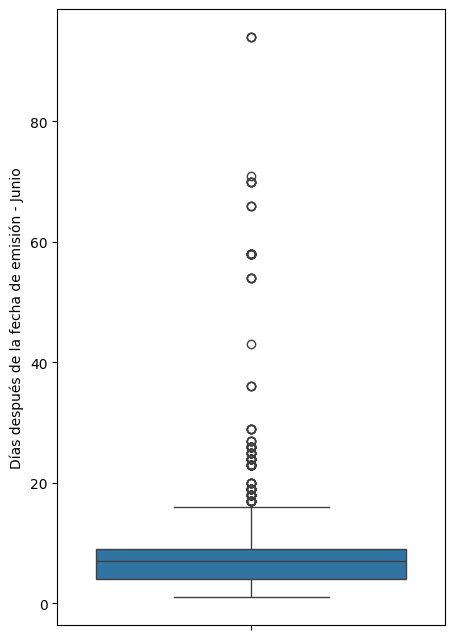

El Q1 es 4.0
El Q3 es 9.0


In [161]:
#Graficar Diagrama de cajas para ver la distribución de los datos
plt.figure(figsize=(5,8))
sns.boxplot(data=pagos_adelantados_junio["VAR_DIAS_ADEL"]).set_ylabel("Días después de la fecha de emisión - Junio")
plt.show()
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = pagos_adelantados_junio['VAR_DIAS_ADEL'].quantile(0.25)
Q3 = pagos_adelantados_junio['VAR_DIAS_ADEL'].quantile(0.75)
print(f"El Q1 es {Q1}")
print(f"El Q3 es {Q3}")

In [162]:
# Calcular el IQR (rango intercuartílico)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrar los datos dentro de los bigotes
data_dentro_bigotes = pagos_adelantados_junio[(pagos_adelantados_junio['VAR_DIAS_ADEL'] >= limite_inferior) 
                                              & (pagos_adelantados_junio['VAR_DIAS_ADEL'] <= limite_superior)]
 
# Contar cuántos datos hay dentro de los bigotes
cantidad_dentro_bigotes = data_dentro_bigotes.shape[0]
 
# Contar el total de datos
total_datos = pagos_adelantados_junio.shape[0]
 
# Calcular el porcentaje de datos dentro de los bigotes
porcentaje_dentro_bigotes = (cantidad_dentro_bigotes / total_datos) * 100

print(f"Cantidad de data dentro de los bigotes: {cantidad_dentro_bigotes}")
print(f"Cantidad de data total de enero: {total_datos}")
print(f"Porcentaje de data dentro de los bigotes: {round(porcentaje_dentro_bigotes,2)}")

Cantidad de data dentro de los bigotes: 27601
Cantidad de data total de enero: 27785
Porcentaje de data dentro de los bigotes: 99.34


In [164]:
data_dentro_bigotes.shape

(27601, 21)

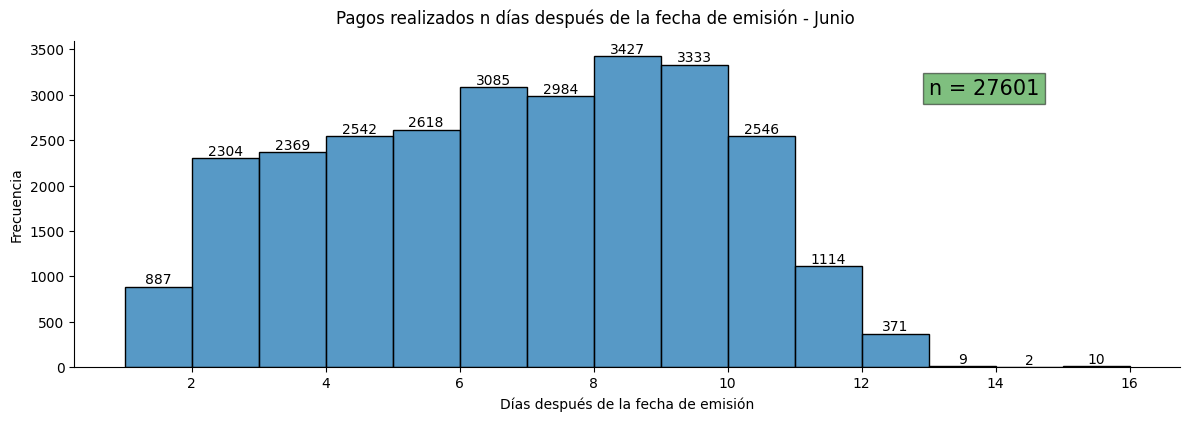

In [166]:
#Graficar histograma de los pagos
hist = sns.displot(data_dentro_bigotes["VAR_DIAS_ADEL"], 
            bins=15 ,height=4, aspect=3)
hist.fig.suptitle("Pagos realizados n días después de la fecha de emisión - Junio", y=1.04)
hist.set_axis_labels("Días después de la fecha de emisión", "Frecuencia")
data = data_dentro_bigotes.shape[0]
plt.text(13,3000,f"n = {data}", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
# Agregar etiquetas de datos sobre las barras
for ax in hist.axes.flat:  # Acceder al objeto Axes
    for p in ax.patches:  # Iterar sobre cada barra
        height = p.get_height()  # Obtener la altura (frecuencia) de cada barra
        ax.annotate(f'{int(height)}',  # Texto a mostrar (frecuencia)
                    (p.get_x() + p.get_width() / 2, height),  # Coordenadas
                    ha='center', va='bottom')  # Alineación
plt.show()

In [ ]:
#ANÁLISIS JULIO
pagos_adelantados_julio = pagos_adelantados[(pagos_adelantados["FECHA_PAGO"] >= "2024-07-01") & 
                  (pagos_adelantados["FECHA_PAGO"] <= "2024-07-31") &
                  (pagos_adelantados["VAR_DIAS_ADEL"]>0)]
pagos_adelantados_julio.tail()

In [168]:
#cant. de filas y columnas de la tabla
pagos_adelantados_julio.shape

(30444, 21)

In [170]:
#Resumen estadístico de la variable de análisis
pagos_adelantados_julio["VAR_DIAS_ADEL"].describe()

count    30444.000000
mean         6.766851
std          3.748250
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         72.000000
Name: VAR_DIAS_ADEL, dtype: float64

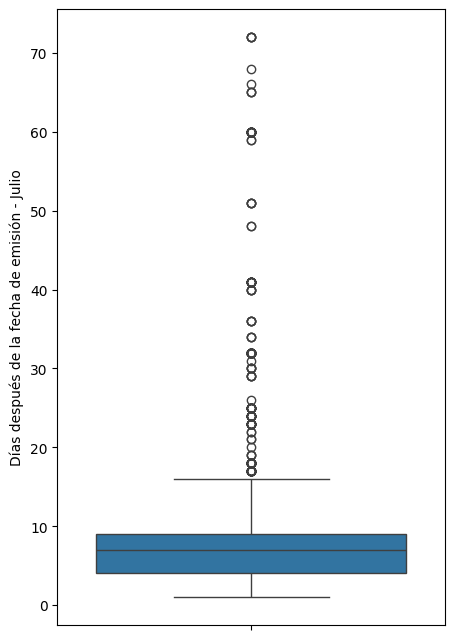

El Q1 es 4.0
El Q3 es 9.0


In [171]:
#Graficar Diagrama de cajas para ver la distribución de los datos
plt.figure(figsize=(5,8))
sns.boxplot(data=pagos_adelantados_julio["VAR_DIAS_ADEL"]).set_ylabel("Días después de la fecha de emisión - Julio")
plt.show()
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = pagos_adelantados_julio['VAR_DIAS_ADEL'].quantile(0.25)
Q3 = pagos_adelantados_julio['VAR_DIAS_ADEL'].quantile(0.75)
print(f"El Q1 es {Q1}")
print(f"El Q3 es {Q3}")

In [172]:
# Calcular el IQR (rango intercuartílico)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrar los datos dentro de los bigotes
data_dentro_bigotes = pagos_adelantados_julio[(pagos_adelantados_julio['VAR_DIAS_ADEL'] >= limite_inferior) 
                                              & (pagos_adelantados_julio['VAR_DIAS_ADEL'] <= limite_superior)]
 
# Contar cuántos datos hay dentro de los bigotes
cantidad_dentro_bigotes = data_dentro_bigotes.shape[0]
 
# Contar el total de datos
total_datos = pagos_adelantados_julio.shape[0]
 
# Calcular el porcentaje de datos dentro de los bigotes
porcentaje_dentro_bigotes = (cantidad_dentro_bigotes / total_datos) * 100

print(f"Cantidad de data dentro de los bigotes: {cantidad_dentro_bigotes}")
print(f"Cantidad de data total de enero: {total_datos}")
print(f"Porcentaje de data dentro de los bigotes: {round(porcentaje_dentro_bigotes,2)}")

Cantidad de data dentro de los bigotes: 30222
Cantidad de data total de enero: 30444
Porcentaje de data dentro de los bigotes: 99.27


In [174]:
data_dentro_bigotes.shape

(30222, 21)

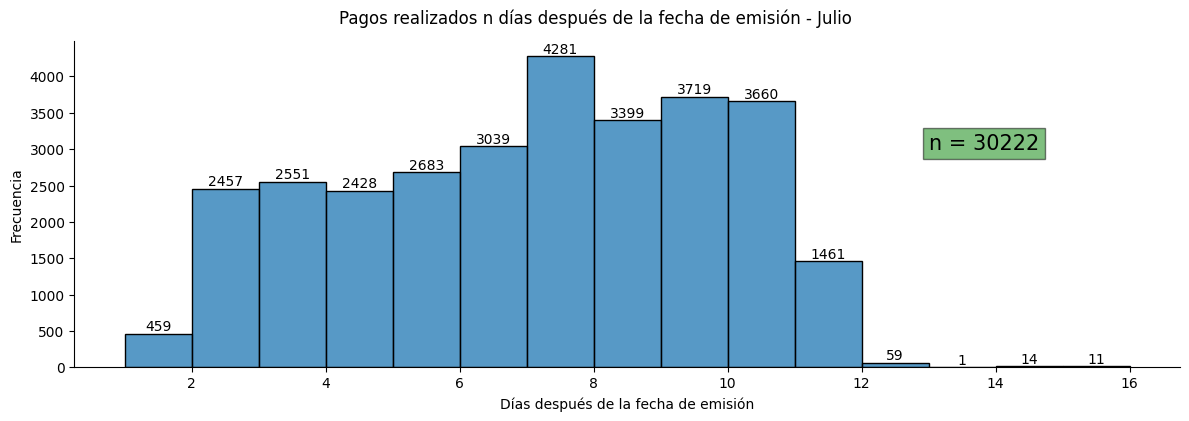

In [176]:
#Graficar histograma de los pagos
hist = sns.displot(data_dentro_bigotes["VAR_DIAS_ADEL"], 
            bins=15 ,height=4, aspect=3)
hist.fig.suptitle("Pagos realizados n días después de la fecha de emisión - Julio", y=1.04)
hist.set_axis_labels("Días después de la fecha de emisión", "Frecuencia")
data = data_dentro_bigotes.shape[0]
plt.text(13,3000,f"n = {data}", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
# Agregar etiquetas de datos sobre las barras
for ax in hist.axes.flat:  # Acceder al objeto Axes
    for p in ax.patches:  # Iterar sobre cada barra
        height = p.get_height()  # Obtener la altura (frecuencia) de cada barra
        ax.annotate(f'{int(height)}',  # Texto a mostrar (frecuencia)
                    (p.get_x() + p.get_width() / 2, height),  # Coordenadas
                    ha='center', va='bottom')  # Alineación
plt.show()

In [ ]:
#ANÁLISIS AGOSTO
pagos_adelantados_agosto = pagos_adelantados[(pagos_adelantados["FECHA_PAGO"] >= "2024-08-01") & 
                  (pagos_adelantados["FECHA_PAGO"] <= "2024-08-31") &
                  (pagos_adelantados["VAR_DIAS_ADEL"]>0)]
pagos_adelantados_agosto.tail()

In [178]:
#cant. de filas y columnas de la tabla
pagos_adelantados_agosto.shape

(27967, 21)

In [179]:
#Resumen estadístico de la variable de análisis
pagos_adelantados_agosto["VAR_DIAS_ADEL"].describe()

count    27967.000000
mean         6.758573
std          3.752145
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         96.000000
Name: VAR_DIAS_ADEL, dtype: float64

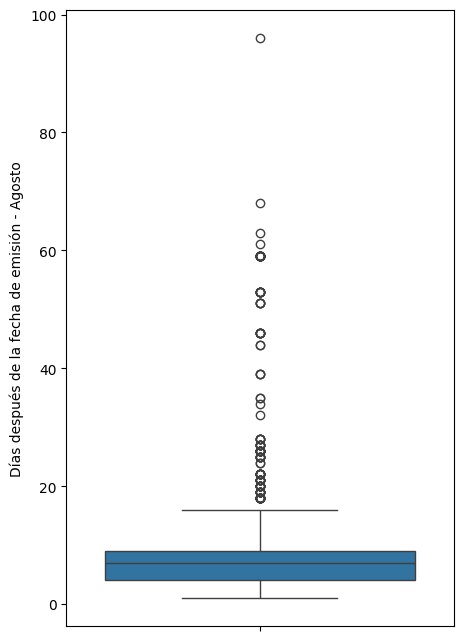

El Q1 es 4.0
El Q3 es 9.0


In [180]:
#Graficar Diagrama de cajas para ver la distribución de los datos
plt.figure(figsize=(5,8))
sns.boxplot(data=pagos_adelantados_agosto["VAR_DIAS_ADEL"]).set_ylabel("Días después de la fecha de emisión - Agosto")
plt.show()
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = pagos_adelantados_agosto['VAR_DIAS_ADEL'].quantile(0.25)
Q3 = pagos_adelantados_agosto['VAR_DIAS_ADEL'].quantile(0.75)
print(f"El Q1 es {Q1}")
print(f"El Q3 es {Q3}")

In [181]:
# Calcular el IQR (rango intercuartílico)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrar los datos dentro de los bigotes
data_dentro_bigotes = pagos_adelantados_agosto[(pagos_adelantados_agosto['VAR_DIAS_ADEL'] >= limite_inferior) 
                                              & (pagos_adelantados_agosto['VAR_DIAS_ADEL'] <= limite_superior)]
 
# Contar cuántos datos hay dentro de los bigotes
cantidad_dentro_bigotes = data_dentro_bigotes.shape[0]
 
# Contar el total de datos
total_datos = pagos_adelantados_agosto.shape[0]
 
# Calcular el porcentaje de datos dentro de los bigotes
porcentaje_dentro_bigotes = (cantidad_dentro_bigotes / total_datos) * 100

print(f"Cantidad de data dentro de los bigotes: {cantidad_dentro_bigotes}")
print(f"Cantidad de data total de enero: {total_datos}")
print(f"Porcentaje de data dentro de los bigotes: {round(porcentaje_dentro_bigotes,2)}")

Cantidad de data dentro de los bigotes: 27809
Cantidad de data total de enero: 27967
Porcentaje de data dentro de los bigotes: 99.44


In [183]:
data_dentro_bigotes.shape

(27809, 21)

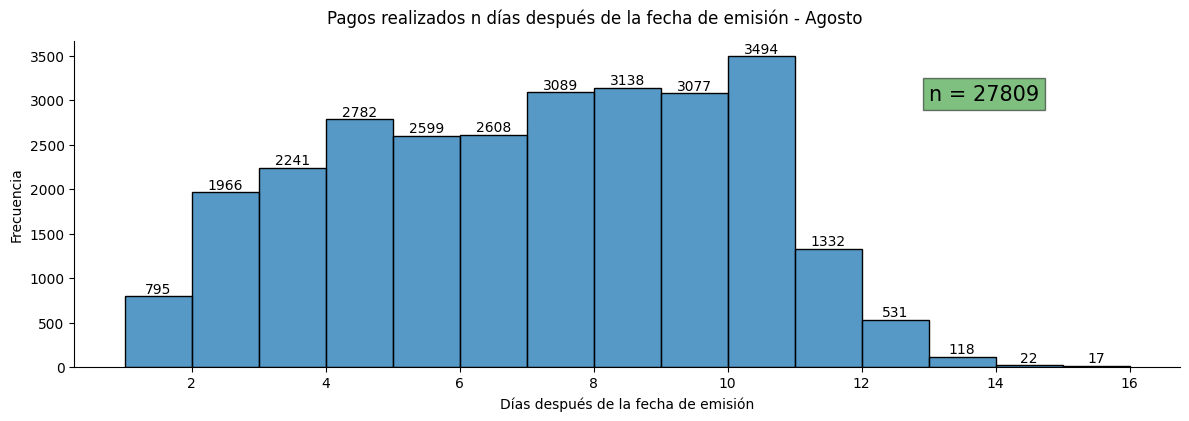

In [185]:
#Graficar histograma de los pagos
hist = sns.displot(data_dentro_bigotes["VAR_DIAS_ADEL"], bins=15 ,height=4, aspect=3)
hist.fig.suptitle("Pagos realizados n días después de la fecha de emisión - Agosto", y=1.04)
hist.set_axis_labels("Días después de la fecha de emisión", "Frecuencia")
data = data_dentro_bigotes.shape[0]
plt.text(13,3000,f"n = {data}", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
# Agregar etiquetas de datos sobre las barras
for ax in hist.axes.flat:  # Acceder al objeto Axes
    for p in ax.patches:  # Iterar sobre cada barra
        height = p.get_height()  # Obtener la altura (frecuencia) de cada barra
        ax.annotate(f'{int(height)}',  # Texto a mostrar (frecuencia)
                    (p.get_x() + p.get_width() / 2, height),  # Coordenadas
                    ha='center', va='bottom')  # Alineación
plt.show()

In [ ]:
#ANÁLISIS SEPTIEMBRE
pagos_adelantados_septiembre = pagos_adelantados[(pagos_adelantados["FECHA_PAGO"] >= "2024-09-01") & 
                  (pagos_adelantados["FECHA_PAGO"] <= "2024-09-30") &
                  (pagos_adelantados["VAR_DIAS_ADEL"]>0)]
pagos_adelantados_septiembre.tail()

In [187]:
#cant. de filas y columnas de la tabla
pagos_adelantados_septiembre.shape

(27043, 21)

In [188]:
#Resumen estadístico de la variable de análisis
pagos_adelantados_septiembre["VAR_DIAS_ADEL"].describe()

count    27043.000000
mean         6.510224
std          4.165862
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         86.000000
Name: VAR_DIAS_ADEL, dtype: float64

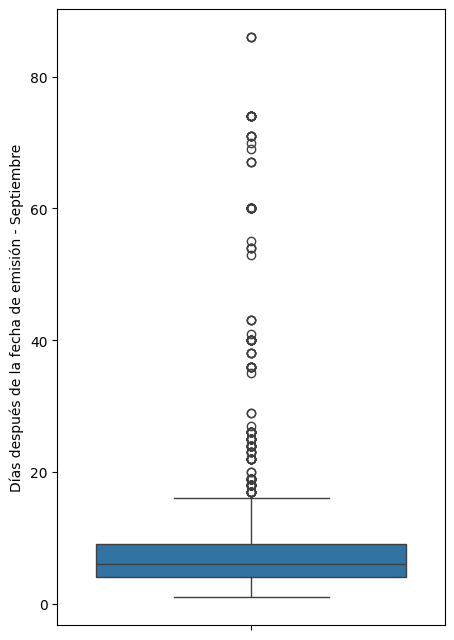

El Q1 es 4.0
El Q3 es 9.0


In [189]:
#Graficar Diagrama de cajas para ver la distribución de los datos
plt.figure(figsize=(5,8))
sns.boxplot(data=pagos_adelantados_septiembre["VAR_DIAS_ADEL"]).set_ylabel("Días después de la fecha de emisión - Septiembre")
plt.show()
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = pagos_adelantados_septiembre['VAR_DIAS_ADEL'].quantile(0.25)
Q3 = pagos_adelantados_septiembre['VAR_DIAS_ADEL'].quantile(0.75)
print(f"El Q1 es {Q1}")
print(f"El Q3 es {Q3}")

In [190]:
# Calcular el IQR (rango intercuartílico)
IQR = Q3 - Q1

# Calcular los límites de los bigotes
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrar los datos dentro de los bigotes
data_dentro_bigotes = pagos_adelantados_septiembre[(pagos_adelantados_septiembre['VAR_DIAS_ADEL'] >= limite_inferior) 
                                              & (pagos_adelantados_septiembre['VAR_DIAS_ADEL'] <= limite_superior)]
 
# Contar cuántos datos hay dentro de los bigotes
cantidad_dentro_bigotes = data_dentro_bigotes.shape[0]
 
# Contar el total de datos
total_datos = pagos_adelantados_septiembre.shape[0]
 
# Calcular el porcentaje de datos dentro de los bigotes
porcentaje_dentro_bigotes = (cantidad_dentro_bigotes / total_datos) * 100

print(f"Cantidad de data dentro de los bigotes: {cantidad_dentro_bigotes}")
print(f"Cantidad de data total de enero: {total_datos}")
print(f"Porcentaje de data dentro de los bigotes: {round(porcentaje_dentro_bigotes,2)}")

Cantidad de data dentro de los bigotes: 26843
Cantidad de data total de enero: 27043
Porcentaje de data dentro de los bigotes: 99.26


In [192]:
data_dentro_bigotes.shape

(26843, 21)

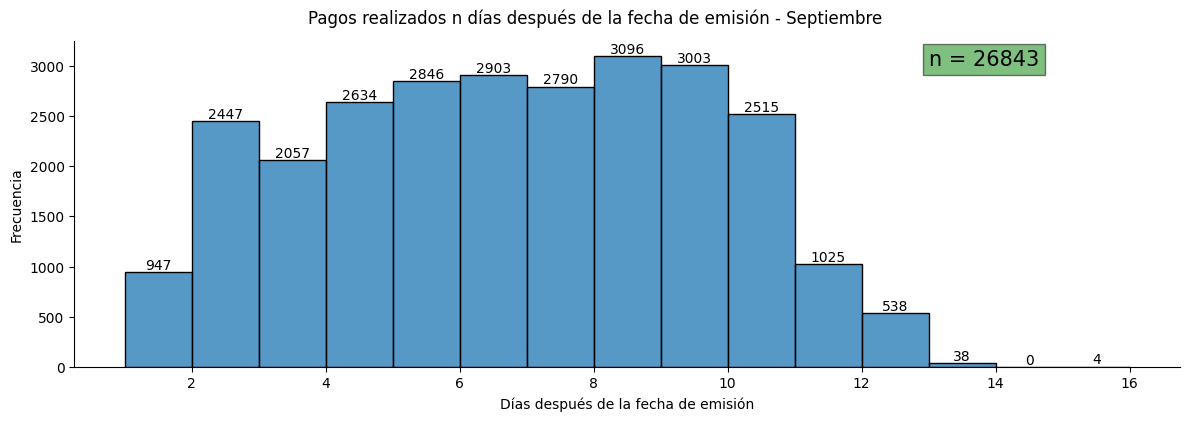

In [194]:
#Graficar histograma de los pagos
hist = sns.displot(data_dentro_bigotes["VAR_DIAS_ADEL"], bins=15 ,height=4, aspect=3)
hist.fig.suptitle("Pagos realizados n días después de la fecha de emisión - Septiembre", y=1.04)
hist.set_axis_labels("Días después de la fecha de emisión", "Frecuencia")
data = data_dentro_bigotes.shape[0]
plt.text(13,3000,f"n = {data}", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
# Agregar etiquetas de datos sobre las barras
for ax in hist.axes.flat:  # Acceder al objeto Axes
    for p in ax.patches:  # Iterar sobre cada barra
        height = p.get_height()  # Obtener la altura (frecuencia) de cada barra
        ax.annotate(f'{int(height)}',  # Texto a mostrar (frecuencia)
                    (p.get_x() + p.get_width() / 2, height),  # Coordenadas
                    ha='center', va='bottom')  # Alineación
plt.show()